# Cross validation

In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

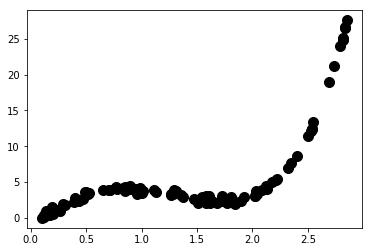

In [12]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [13]:
x=np.vstack(x)

# k-fold

In [19]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=3)
kf.get_n_splits(x)

3

In [21]:
scores = list()
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
for train_index, test_index in kf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scores.append(model2.fit(X_train, y_train).score(X_test, y_test))
    print(model2.fit(X_train, y_train).score(X_test, y_test))
print(scores)

0.797938476246
0.659048974362
0.668071089777
[0.79793847624634584, 0.65904897436225052, 0.66807108977656715]


In [22]:
kfold = KFold(n_splits=3)
[model2.fit(x[train], y[train]).score(x[test], y[test]) for train, test in kfold.split(x)]

[0.79793847624634584, 0.65904897436225052, 0.66807108977656715]

# cross_val_score
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(model2, x, y, cv=kfold)

array([ 0.79793848,  0.65904897,  0.66807109])

In [41]:
cross_val_score(model2, x, y, cv=kfold, scoring='r2')

array([ 0.79793848,  0.65904897,  0.66807109])

In [42]:
cross_val_score(model2, x, y, cv=kfold, scoring='neg_median_absolute_error')

array([-2.32676063, -2.59784465, -3.14429022])

# cross_val_predict

In [43]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(model2, x, y, cv=kfold)

array([  2.35769048,   5.88336385,   3.11102148,   6.12255559,
         1.93239304,   1.91483594,   1.91404578,   4.48757242,
         3.71140377,  18.50018451,  16.76946156,   2.87010325,
         2.26177089,   1.86484072,  18.49414324,   2.76587924,
         2.85018526,   1.33754498,   7.2174322 ,   9.26222774,
         1.52337593,   1.33966168,  15.95328043,   7.75637647,
         3.92484469,   1.29821561,   7.09560368,   5.21285591,
         1.50109037,  10.56412206,   4.47283372,   3.84178134,
        17.6656275 ,  11.69280047,   5.16414242,   4.46049145,
         3.21710114,   4.31390889,  14.87704686,   0.69871678,
         1.01797231,   1.99962345,   4.7389114 ,   0.70278957,
         1.32291827,   2.13492322,   0.95637537,   8.05774361,
         3.23056641,   5.73941493,   0.65704802,   5.95794354,
         0.66827893,   4.18087673,   2.68108759,   1.35569035,
         4.92099141,  21.08528717,   1.09078161,   2.93275119,
        14.60666546,   2.22241623,   2.46047388,   0.79

# Zadanie 
Wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

oraz podaj uśrednione wartości dla każdej z nich.
